# Perform a basic first pass on 'Zhou et al. Band gap data'

## Import the libraries we will be using

In [1]:
# read in data with pandas
import pandas as pd
# use numpy for vector and matrix operations
import numpy as np

# composition is a custom made python file that generates composition-based feature vectors (CBFV)
import composition
# utils is a custom made python file that has some useful functions
import utils

# make nice figures
import matplotlib.pyplot as plt
# machine learnign algorithms
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

## Process the data and get it formated for machine learning

In [2]:
# read in band gap data from Zhou et al. publication:
# J. Phys. Chem. Lett., 2018, 9 (7), pp 1668–1673
#DOI: 10.1021/acs.jpclett.8b00124
#Publication Date (Web): March 13, 2018
df_band_gap = pd.read_excel('jz8b00124_si_002.xlsx')

In [3]:
df_band_gap.head()

,composition,Eg (eV)
0,Hg0.7Cd0.3Te,0.350
1,CuBr,3.077
2,LuP,1.300
3,Cu3SbSe4,0.400
4,ZnO,3.436


In [4]:
# rename columns for use with feature generation
df_band_gap.columns = ['formula', 'target']

## Featurize the data

In [5]:
X, y, formula = composition.generate_features(df_band_gap)

The element: Eu from formula EuYb2Se4 is not currently supported in our database
The element: Eu from formula Ba3EuP3O12 is not currently supported in our database
The element: Eu from formula EuSb4S7 is not currently supported in our database
The element: Eu from formula Na0.75Eu1.625GeSe4 is not currently supported in our database
The element: Eu from formula EuBiW2O9 is not currently supported in our database
The element: Eu from formula Sr3EuP3O12 is not currently supported in our database
The element: Eu from formula Eu3Sb4S9 is not currently supported in our database
The element: Eu from formula EuHo2Se4 is not currently supported in our database
The element: Eu from formula Na2EuGeSe4 is not currently supported in our database
The element: Eu from formula EuLiH3 is not currently supported in our database
The element: Eu from formula Eu2Se3 is not currently supported in our database
The element: Eu from formula EuO is not currently supported in our database
The element: Eu from f

The element: Pm from formula Pm2LiGa is not currently supported in our database
There was an error with the formula: "Ba2LiFe2N3,15", please check the formatting
There was an error with the formula: "P2H12N7Cl,2", please check the formatting
There was an error with the formula: "Te3MoWS,156", please check the formatting
There was an error with the formula: "Nb4Co2PdSe12,12", please check the formatting
The element: Eu from formula EuPPt is not currently supported in our database
The element: Pm from formula PmCdPd2 is not currently supported in our database
There was an error with the formula: "MgCo2(PO5)2,70", please check the formatting
There was an error with the formula: "Sr2Cu(ClO)2,139", please check the formatting
There was an error with the formula: "RbNa2NiO2,139", please check the formatting
There was an error with the formula: "Li5Mn3(FeO5)2,2", please check the formatting
The element: Eu from formula EuSbO3 is not currently supported in our database
There was an error with 

There was an error with the formula: "LiCo(CO3)2,148", please check the formatting
The element: Eu from formula EuNi2As2 is not currently supported in our database
There was an error with the formula: "Te2Mo2WSe4,156", please check the formatting
There was an error with the formula: "LiBi2(PO4)3,15", please check the formatting
There was an error with the formula: "K2B10H9O,14", please check the formatting
There was an error with the formula: "Ba2FeMoO6,225", please check the formatting
There was an error with the formula: "LiMnCuO4,74", please check the formatting
There was an error with the formula: "InFe2CuSe4,121", please check the formatting
There was an error with the formula: "Li3CrCo3O8,166", please check the formatting
There was an error with the formula: "Li3Co(NiO2)4,12", please check the formatting
There was an error with the formula: "Li2Nb2(PO4)3,15", please check the formatting
There was an error with the formula: "YB2Rh2C,139", please check the formatting
There was an e

The element: Eu from formula EuCd2Sb2 is not currently supported in our database
There was an error with the formula: "Li5La3Nb14O42,12", please check the formatting
There was an error with the formula: "CeCoGeH,129", please check the formatting
There was an error with the formula: "LiNi2(PO4)3,15", please check the formatting
The element: Pm from formula PmMgRh2 is not currently supported in our database
There was an error with the formula: "KTa3CuO9,53", please check the formatting
The element: Eu from formula EuGe3Pt is not currently supported in our database
There was an error with the formula: "Li2Co4O7F,8", please check the formatting
There was an error with the formula: "Li4Mn5NbO12,12", please check the formatting
There was an error with the formula: "Lu2Fe2Si2C,12", please check the formatting
There was an error with the formula: "CsVP2S7,5", please check the formatting
There was an error with the formula: "Rb2SCl6F,225", please check the formatting
There was an error with the

There was an error with the formula: "TbBaMn2O6,51", please check the formatting
There was an error with the formula: "Cu2Hg2SF6,227", please check the formatting
There was an error with the formula: "Te4Mo(WS)2,187", please check the formatting
There was an error with the formula: "Li2V3CrO8,166", please check the formatting
There was an error with the formula: "Ba2BiSbO6,2", please check the formatting
There was an error with the formula: "Cu4H10SO12,7", please check the formatting
The element: Pm from formula PmGaAu2 is not currently supported in our database
There was an error with the formula: "Li4Co2Ni3O10,10", please check the formatting
There was an error with the formula: "TmU2S3O2,139", please check the formatting
There was an error with the formula: "CrH9(CN2)3,2", please check the formatting
There was an error with the formula: "Ca2CuWO6,14", please check the formatting
There was an error with the formula: "Ba2CoWO6,225", please check the formatting
There was an error with 

In [6]:
bad_formula = "Eu2C(NO)2,164"
print(bad_formula.split(','))
print(bad_formula.split(',')[0])

['Eu2C(NO)2', '164']
Eu2C(NO)2


In [7]:
df_band_gap['formula'] = [formula.split(',')[0] for formula in df_band_gap['formula']]

## There is another issue I notice. There is no element symbol 'G' ....
#The element: G from formula GaAs0.1P0.9G1128 is not currently supported in our database
df_band_gap.replace("GaAs0.1P0.9G1128", "GaAs0.1P0.9", inplace=True)

In [8]:
X, y, formula = composition.generate_features(df_band_gap)

The element: Eu from formula EuYb2Se4 is not currently supported in our database
The element: Eu from formula Ba3EuP3O12 is not currently supported in our database
The element: Eu from formula EuSb4S7 is not currently supported in our database
The element: Eu from formula Na0.75Eu1.625GeSe4 is not currently supported in our database
The element: Eu from formula EuBiW2O9 is not currently supported in our database
The element: Eu from formula Sr3EuP3O12 is not currently supported in our database
The element: Eu from formula Eu3Sb4S9 is not currently supported in our database
The element: Eu from formula EuHo2Se4 is not currently supported in our database
The element: Eu from formula Na2EuGeSe4 is not currently supported in our database
The element: Eu from formula EuLiH3 is not currently supported in our database
The element: Eu from formula Eu2Se3 is not currently supported in our database
The element: Eu from formula EuO is not currently supported in our database
The element: Eu from f

The element: Eu from formula EuNaO2 is not currently supported in our database
The element: Eu from formula EuCo8P5 is not currently supported in our database
The element: Eu from formula EuCd11 is not currently supported in our database
The element: Pm from formula YbPmPt2 is not currently supported in our database
The element: Eu from formula EuAgSb is not currently supported in our database
The element: Eu from formula EuCd2Sb2 is not currently supported in our database
The element: Pm from formula PmMgRh2 is not currently supported in our database
The element: Eu from formula EuGe3Pt is not currently supported in our database
The element: Pm from formula PmLi2Al is not currently supported in our database
The element: Pm from formula PmLi2Ge is not currently supported in our database
The element: Eu from formula EuClO is not currently supported in our database
The element: Eu from formula Eu2TeO2 is not currently supported in our database
The element: Eu from formula EuScO3 is not c

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train.head()

,sum_C-0,sum_C-1,sum_C-10,sum_C-11,sum_C-12,sum_C-13,sum_C-14,sum_C-15,sum_C-16,sum_C-17,...,range_voro_coord_subs_atom_mass,range_voro_coord_subs_atom_rad,range_voro_coord_subs_bp,range_voro_coord_subs_elec_aff,range_voro_coord_subs_first_ion_en,range_voro_coord_subs_hfus,range_voro_coord_subs_mol_vol,range_voro_coord_subs_mp,range_voro_coord_subs_polzbl,range_voro_coord_subs_therm_cond
298,14.250000,3.750000,0.000000,0.0,13.650000,1.950000,23.6500,0.0,0.000000,0.0,...,46.436670,4.05,498.6,7.483,11.274132,5.05570,25.04,79.39,37.245,52.55100
3085,94.928571,50.028571,0.571429,0.0,43.671429,43.814286,99.5000,0.0,0.357143,0.0,...,27.942100,6.25,3582.8,7.904,13.871860,6.78720,16.04,2121.20,4.598,23.97342
26,54.387500,22.550000,1.500000,0.0,26.475000,21.562500,91.8625,0.0,0.000000,0.0,...,158.992807,7.65,2572.0,7.772,12.019347,7.89171,37.73,1013.03,39.430,312.76400
3908,190.890000,89.050000,0.000000,0.0,97.630000,85.840000,159.1500,0.0,0.000000,0.0,...,140.516238,6.60,4319.0,7.720,10.661620,7.01800,15.46,2181.70,11.400,64.76400
1578,116.750000,15.300000,0.000000,0.0,33.700000,14.050000,50.6500,0.0,0.000000,0.0,...,78.844238,4.45,1790.0,5.431,9.700330,5.15249,6.26,107.45,1.020,76.76400


## We can now apply machine learning algorithms to the formated data

R2 score = 0.6593383838529603


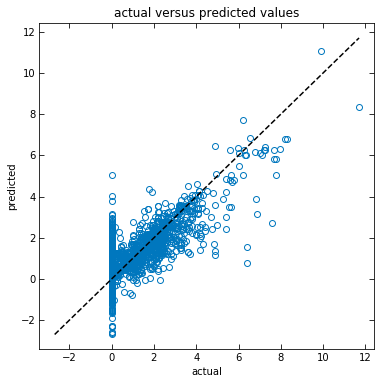

In [10]:
# Initialize a "LinearRegression" object. This will allow us to do a simple linear regression on the data
lr = LinearRegression()
# Call the fit function to perform the ML step
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print('R2 score =', lr.score(X_test, y_test))
utils.plot_act_vs_pred(y_test, y_pred)

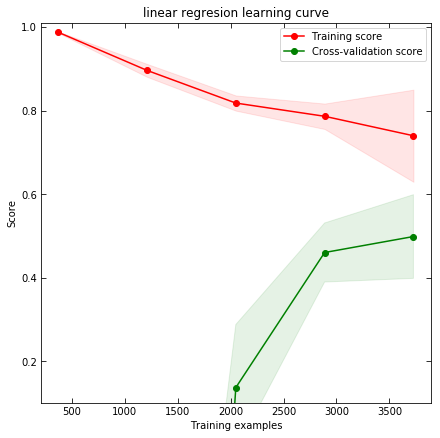

In [11]:
title = "linear regresion learning curve"
utils.plot_learning_curve(lr, title, X_train, y_train, ylim=(0.1, 1.01), cv=5, n_jobs=-1)

R2 score = 0.7802040510481535


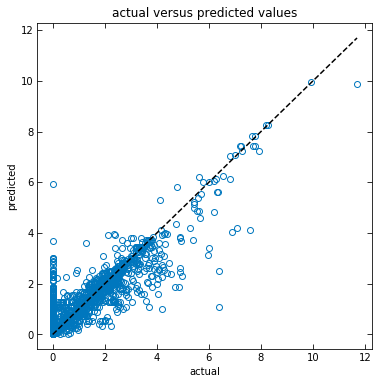

In [12]:
# Initialize a 'RandomForestRegressor" object.
rf = RandomForestRegressor()
# Call the fit function to perform the ML step
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print('R2 score =', rf.score(X_test, y_test))
utils.plot_act_vs_pred(y_test, y_pred)

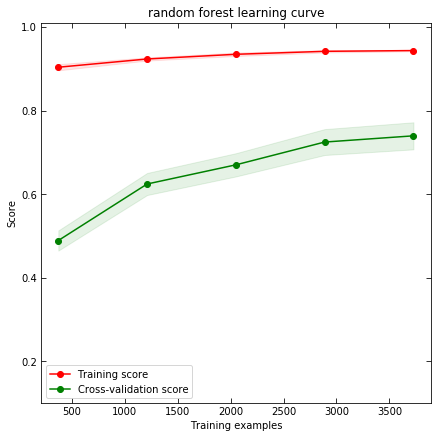

In [13]:
title = "random forest learning curve"
utils.plot_learning_curve(rf, title, X_train, y_train, ylim=(0.1, 1.01), cv=5, n_jobs=-1)